# <font size=6 face='黑体'>Qiwsir eighth lesson:特征工程

<font size=5 face='黑体'>1、特征编码

<font size=4 color=red face='黑体'>数值化数据

In [1]:
import pandas as pd
students = pd.DataFrame({'name':['Facebook','Google','Twitter','Apple'],
                        'class':['one','two','three','one']})
students

,name,class
0,Facebook,one
1,Google,two
2,Twitter,three
3,Apple,one


In [2]:
students['class'].replace({'one':1,'two':2,'three':3},inplace=True)
students

,name,class
0,Facebook,1
1,Google,2
2,Twitter,3
3,Apple,1


In [3]:
students.dtypes

name     object
class     int64
dtype: object

In [4]:
persons = pd.DataFrame({'name':['Newton','Andrew Ng','Jodan','Bill Gates'],
                       'color':['white','yellow','black','white']})
persons

,name,color
0,Newton,white
1,Andrew Ng,yellow
2,Jodan,black
3,Bill Gates,white


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(persons['color'])
persons['color'] = labels
persons

,name,color
0,Newton,1
1,Andrew Ng,2
2,Jodan,0
3,Bill Gates,1


<font color=red size=4 face='黑体'>离散化数据

<font size=4 color=red face='黑体'>one-hot编码

In [19]:
persons['color'] = ['pink','yellow','yellow','pink']
persons

,name,color
0,Newton,pink
1,Andrew Ng,yellow
2,Jodan,yellow
3,Bill Gates,pink


In [9]:
df_dum = pd.get_dummies(persons['color'])
df_dum

,black,white,yellow
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0


In [11]:
persons.join(df_dum)

,name,color,black,white,yellow
0,Newton,white,0,1,0
1,Andrew Ng,yellow,0,0,1
2,Jodan,black,1,0,0
3,Bill Gates,white,0,1,0


In [12]:
persons.merge(df_dum,left_index=True,right_index=True)

,name,color,black,white,yellow
0,Newton,white,0,1,0
1,Andrew Ng,yellow,0,0,1
2,Jodan,black,1,0,0
3,Bill Gates,white,0,1,0


In [13]:
pd.concat([persons,df_dum],axis=1)

,name,color,black,white,yellow
0,Newton,white,0,1,0
1,Andrew Ng,yellow,0,0,1
2,Jodan,black,1,0,0
3,Bill Gates,white,0,1,0


In [14]:
pd.concat([persons,pd.get_dummies(persons['color'],drop_first=True)],axis=1)

,name,color,white,yellow
0,Newton,white,1,0
1,Andrew Ng,yellow,0,1
2,Jodan,black,0,0
3,Bill Gates,white,1,0


In [22]:
students = pd.DataFrame({"gender": ["men", 'women', 'women', 'men', 'women'], 'name':["zhang", 'wang', 'zhao', 'qian','sun']})
students

,gender,name
0,men,zhang
1,women,wang
2,women,zhao
3,men,qian
4,women,sun


<font color=red size=4 face='黑体'>这种方式称为one-hot编码，还有另外一种方法实现

In [23]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
features = ohe.fit_transform(students[['gender']])
features.toarray()

ValueError: could not convert string to float: 'men'

<font size=4 color=red face='黑体'>二值化：处理离散特征以及连续性特征

In [24]:
pm25 = pd.read_csv(r'C:\Users\yy\qiwei-data\DataSet\pm25\pm2.csv')
pm25.describe()

,RANK,CITY_ID,Exposed days
count,264.000000,264.000000,264.000000
mean,146.272727,330.405303,108.590909
std,83.933397,186.484137,58.626219
min,1.000000,1.000000,2.000000
25%,73.750000,171.250000,64.750000
50%,144.500000,340.000000,98.000000
75%,220.250000,494.250000,144.250000
max,286.000000,636.000000,279.000000


In [25]:
import numpy as np
pm25['result'] = np.where(pm25['Exposed days'] > pm25['Exposed days'].mean(),1,0)
pm25.sample(10)

,RANK,CITY_ID,CITY_NAME,Exposed days,result
232,255,386,周口,191,1
180,203,438,岳阳,132,1
122,134,283,南昌,94,0
124,136,62,通辽,96,0
193,216,249,滁州,140,1
77,86,303,上饶,71,0
96,107,514,河池,85,0
108,120,167,上海,88,0
167,190,546,内江,124,1
263,286,15,邢台,279,1


In [29]:
from sklearn.preprocessing import Binarizer
bn = Binarizer(threshold=109)       #表示当特征小于109时输出0，大于109时输出1
result = bn.fit_transform(pm25[['Exposed days']])  #注意，使用列表为下标，返回的是一个（n，1）的数组
pm25['result2'] = result

In [30]:
pm25.sample(10)

,RANK,CITY_ID,CITY_NAME,Exposed days,result,result2
17,19,484,汕尾,27,0,0
188,211,168,南京,138,1,1
97,108,565,遵义,85,0,0
176,199,199,泰州,130,1,1
124,136,62,通辽,96,0,0
139,156,127,松原,104,0,0
160,182,187,连云港,120,1,1
99,110,287,九江,86,0,0
22,25,470,湛江,32,0,0
214,237,344,临沂,166,1,1


<font size=4 color=red face='黑体'>生成多项式特征

<font size=4 color=red>通过增加一些输入数据的非线性特征来增加模型的复杂度通常是有效的。一个简单通用的办法是使用多项式特征，这可以获得特征的更高维度和互相间关系的项。

In [31]:
from sklearn.preprocessing import PolynomialFeatures
x = np.arange(6).reshape(3,2)
poly = PolynomialFeatures(2)   #最高二次（包括交互）
poly.fit_transform(x)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [32]:
#应用：通过统计方法发现运动规律
t = np.linspace(0,100,50)
s = 4.9*t*t
disp = pd.DataFrame({'t':t,'s':s})
disp.head()

,t,s
0,0.000000,0.000000
1,2.040816,20.408163
2,4.081633,81.632653
3,6.122449,183.673469
4,8.163265,326.530612


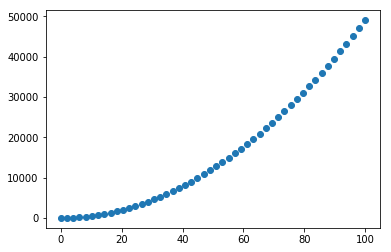

In [38]:
import matplotlib.pyplot as plt
plt.scatter(disp['t'],disp['s'])
plt.show()

In [40]:
poly = PolynomialFeatures(2)
t_poly = poly.fit_transform(disp[['t']])   #注意 下标是列表
t_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.04081633e+00, 4.16493128e+00],
       [1.00000000e+00, 4.08163265e+00, 1.66597251e+01],
       [1.00000000e+00, 6.12244898e+00, 3.74843815e+01],
       [1.00000000e+00, 8.16326531e+00, 6.66389005e+01],
       [1.00000000e+00, 1.02040816e+01, 1.04123282e+02],
       [1.00000000e+00, 1.22448980e+01, 1.49937526e+02],
       [1.00000000e+00, 1.42857143e+01, 2.04081633e+02],
       [1.00000000e+00, 1.63265306e+01, 2.66555602e+02],
       [1.00000000e+00, 1.83673469e+01, 3.37359434e+02],
       [1.00000000e+00, 2.04081633e+01, 4.16493128e+02],
       [1.00000000e+00, 2.24489796e+01, 5.03956685e+02],
       [1.00000000e+00, 2.44897959e+01, 5.99750104e+02],
       [1.00000000e+00, 2.65306122e+01, 7.03873386e+02],
       [1.00000000e+00, 2.85714286e+01, 8.16326531e+02],
       [1.00000000e+00, 3.06122449e+01, 9.37109538e+02],
       [1.00000000e+00, 3.26530612e+01, 1.06622241e+03],
       [1.00000000e+00, 3.46938

In [41]:
disp['t2'] = t_poly[:,2]
disp.head()

,t,s,t2
0,0.000000,0.000000,0.000000
1,2.040816,20.408163,4.164931
2,4.081633,81.632653,16.659725
3,6.122449,183.673469,37.484382
4,8.163265,326.530612,66.638900


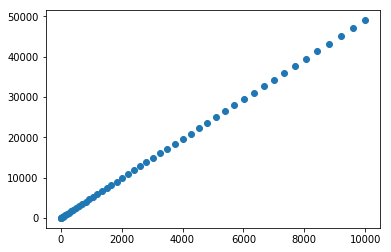

In [42]:
plt.scatter(disp['t2'],disp['s'])
plt.show()

<font size=4 color=red face='黑体'>离散化（将数值型数据转化为类别型数据，包括等值划分和等量划分）

In [44]:
ages = np.array([20,22,25,27,21,23,37,31,61,45,41,32])
factory = pd.cut(ages,4,labels=['Youth','YoungAdult','MiddleAged','Senior'])
factory

[Youth, Youth, Youth, Youth, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [46]:
factory = pd.cut(ages,bins=[18,25,35,60,100],labels=['a','b','c','d'])
test = np.array(factory)
test

array(['a', 'a', 'a', 'b', 'a', 'a', 'c', 'b', 'd', 'c', 'c', 'b'],
      dtype=object)

In [47]:
#等量划分
factory = pd.qcut(ages,4)
factory.value_counts()

(19.999, 22.75]    3
(22.75, 29.0]      3
(29.0, 38.0]       3
(38.0, 61.0]       3
dtype: int64

<font size=5 face='黑体'>2、文本数据的特征工程

<font size=4 color=red face='黑体'>词袋

In [1]:
text = ["You raise me up You raise me up", 
        "so I can stand on mountains",
        "You raise me up", 
        "to walk on stormy seas",
        "I am strong", 
        "when I am on your shoulders",
        "You raise me up",
        "To more than I can be"]
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
train_data = vectorizer.fit_transform(text)
train_data.toarray()

array([[0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]],
      dtype=int64)

In [2]:
import pandas as pd
import numpy as np
vocab = vectorizer.get_feature_names()
pd.DataFrame(train_data.toarray(),columns=vocab)

,am,be,can,me,more,mountains,on,raise,seas,shoulders,...,stand,stormy,strong,than,to,up,walk,when,you,your
0,0,0,0,2,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,2,0
1,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,1
6,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
7,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [5]:
#中文词袋，要先做分词
text = ['国际著名综合类科学期刊美国科学院院刊在线', 
        '发表了苏州大学数学科学学院系统生物学研究中心马欢飞副教授研究课题组的课题',
        '马欢飞副教授是该论文第一作者',
        '苏州大学数学科学学院是唯一第一作者单位',
        '这是我校首次在PNAS发表数学类论文']

import jieba
train_data = [' '.join(jieba.cut(word)) for word in text]
train_data

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yy\AppData\Local\Temp\jieba.cache
Loading model cost 1.492 seconds.
Prefix dict has been built succesfully.


['国际 著名 综合类 科学 期刊 美国科学院 院刊 在线',
 '发表 了 苏州大学 数学 科学 学院 系统 生物学 研究 中心 马欢 飞 副教授 研究 课题组 的 课题',
 '马欢 飞 副教授 是 该 论文 第一 作者',
 '苏州大学 数学 科学 学院 是 唯一 第一 作者 单位',
 '这是 我校 首次 在 PNAS 发表 数学 类 论文']

In [6]:
vect = CountVectorizer()
counts = vect.fit_transform(train_data)
words = vect.get_feature_names()
pd.DataFrame(counts.toarray(),columns=words)

,pnas,中心,作者,副教授,单位,发表,唯一,国际,在线,学院,...,美国科学院,苏州大学,著名,论文,课题,课题组,这是,院刊,首次,马欢
0,0,0,0,0,0,0,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0
1,0,1,0,1,0,1,0,0,0,1,...,0,1,0,0,1,1,0,0,0,1
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


<font size=4 color=red face='黑体'>用频率代替次数重新构建词袋

In [8]:
text = ["You raise me up You raise me up", 
        "so I can stand on mountains",
        "You raise me up", 
        "to walk on stormy seas",
        "I am strong", 
        "when I am on your shoulders",
        "You raise me up",
        "To more than I can be"]

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df=0.,max_df=1.)
counts = tf.fit_transform(text)
words = tf.get_feature_names()
pd.DataFrame(np.round(counts.toarray(),2),columns=words)

,am,be,can,me,more,mountains,on,raise,seas,shoulders,...,stand,stormy,strong,than,to,up,walk,when,you,your
0,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.5,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.5,0.00
1,0.00,0.00,0.41,0.0,0.00,0.49,0.35,0.0,0.00,0.00,...,0.49,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00
2,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.5,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.5,0.00
3,0.00,0.00,0.00,0.0,0.00,0.00,0.35,0.0,0.49,0.00,...,0.00,0.49,0.00,0.00,0.41,0.0,0.49,0.00,0.0,0.00
4,0.64,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.77,0.00,0.00,0.0,0.00,0.00,0.0,0.00
5,0.41,0.00,0.00,0.0,0.00,0.00,0.35,0.0,0.00,0.49,...,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.49,0.0,0.49
6,0.00,0.00,0.00,0.5,0.00,0.00,0.00,0.5,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.5,0.00,0.00,0.5,0.00
7,0.00,0.48,0.40,0.0,0.48,0.00,0.00,0.0,0.00,0.00,...,0.00,0.00,0.00,0.48,0.40,0.0,0.00,0.00,0.0,0.00


In [9]:
#示例
#读取sklearn中的文本数据集
#方法一：
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',shuffle=True)

In [ ]:
#方法二：
from sklearn import datasets
twenty_train = datasets.load_files(r'')

In [10]:
#显示分类名称
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_counts = cv.fit_transform(twenty_train.data)
X_train_counts

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
tt = TfidfTransformer()
X_train_tf = tt.fit_transform(X_train_counts)
X_train_tf.shape

(11314, 130107)

In [16]:
#使用朴素贝叶斯分类，并做出简单预测
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tf,twenty_train.target)

docs_new = ['God is love','OpenGL on the GPU is fast']
X_new_counts = cv.transform(docs_new)
X_new_tf = tt.transform(X_new_counts)

predicted = clf.predict(X_new_tf)
#redicted
for doc,category in zip(docs_new,predicted):
    print('%r => %s' % (doc,twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => rec.autos


<font size=4 color=red face='黑体'>感受fit,fit_transform,transform之间的区别

<font size=5 face='黑体'>3、时间类型的特征

In [17]:
#自行车租赁数据
bikes = pd.read_csv(r'C:\Users\yy\qiwei-data\DataSet\kaggle\bike_sharing_train.csv',
                   error_bad_lines=False)
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [20]:
#对特征datetime进行分解

data = bikes.iloc[:,:1]   #只看datetime这个属性
temp = pd.DatetimeIndex(data['datetime'])
data['date'] = temp.date
data['time'] = temp.time
data['year'] = temp.year
data['month'] = temp.month
data['day'] = temp.day
data['hour'] = temp.hour
data['dayofweek'] = temp.dayofweek
data['dateDays'] = data.date - data.date[0]  #时间长度特征
data['dateDays'] = data['dateDays'].astype('timedelta64[D]')   #转换成float型
data

H:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
H:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
H:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,datetime,date,time,year,month,day,hour,dayofweek,dateDays
0,2011-01-01 00:00:00,2011-01-01,00:00:00,2011,1,1,0,5,0.0
1,2011-01-01 01:00:00,2011-01-01,01:00:00,2011,1,1,1,5,0.0
2,2011-01-01 02:00:00,2011-01-01,02:00:00,2011,1,1,2,5,0.0
3,2011-01-01 03:00:00,2011-01-01,03:00:00,2011,1,1,3,5,0.0
4,2011-01-01 04:00:00,2011-01-01,04:00:00,2011,1,1,4,5,0.0
5,2011-01-01 05:00:00,2011-01-01,05:00:00,2011,1,1,5,5,0.0
6,2011-01-01 06:00:00,2011-01-01,06:00:00,2011,1,1,6,5,0.0
7,2011-01-01 07:00:00,2011-01-01,07:00:00,2011,1,1,7,5,0.0
8,2011-01-01 08:00:00,2011-01-01,08:00:00,2011,1,1,8,5,0.0
9,2011-01-01 09:00:00,2011-01-01,09:00:00,2011,1,1,9,5,0.0


<font size=5 face='黑体'>4、特征标准化

<font size=4 color=red face='黑体'>z-score标准化（标准差标准化）

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [2]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(iris.data)

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

<font size=4 color=red face='黑体'>区间缩放（Min-max 标准化，离差标准化）

<font size=4 color=red face='黑体'>公式：x* = (x-min)/(max-min)

In [7]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(iris.data)

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

<font size=4 color=red face='黑体'>归一化（正则化）

<font size=4 color=red face='黑体'>针对单个样本，对于每个样本将样本缩放到单位范数

In [8]:
from sklearn.preprocessing import Normalizer
Normalizer().fit_transform(iris.data)

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

<font size=4 color=red face='黑体'>StandardScaler是尺寸缩放问题，使同一特征下的数值在一定范围内浮动；
而Nnormalizer是将同一行数据的不用特征进行规范化

# 5、特征选择

## <font color=red>filter:过滤法(按照发散性或者相关性对各个特征进行打分）

In [9]:
from sklearn.feature_selection import VarianceThreshold
VarianceThreshold(threshold=3).fit_transform(iris.data)
#参数threshold=3是为方差的阈值，移除方差较低的特征

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [10]:
#例子：第一列的特征几乎都为0，所以是无用的，可以砍掉
import numpy as np
from sklearn.feature_selection import VarianceThreshold
X = np.array([[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]])
X

array([[0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 1],
       [0, 1, 0],
       [0, 1, 1]])

In [11]:
sel = VarianceThreshold(threshold=0.8*0.2)
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

<font size=4 color=red face='黑体'>单变量特征选择

<font size=4 color=red face='黑体'>能够对每一个特征进行测试（通常采用卡方检验），衡量该特征和响应变量之间的关系，根据得分扔掉不好的特征。（简单易懂，但对特征优化、提高泛化能力不一定有效）

In [3]:
#卡方（chi2）检验
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
SelectKBest(chi2,k=2).fit_transform(iris.data,iris.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [4]:
#例子
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris = load_iris()
X,y = iris.data,iris.target
X.shape

(150, 4)

In [5]:
X_new = SelectKBest(chi2,k=2).fit_transform(X,y)
X_new.shape

(150, 2)

In [7]:
# Pearson相关系数（Pearson Correlation）,试用于回归问题（y连续）
import numpy as np
from scipy.stats import pearsonr
np.random.seed(0)
size = 300
x = np.random.randn(size)
#pearsonr(x,y)的输入为特征矩阵和目标向量
print('lower noise',pearsonr(x,x + np.random.randn(size)))
print('higher noise',pearsonr(x,x + np.random.normal(0,10,size)))

lower noise (0.7182483686213841, 7.32401731299835e-49)
higher noise (0.057964292079338155, 0.3170099388532475)


## <font color=red face='黑体'>Wrapper（包装）：生成特征的不同组合，对组合进行评价比较，寻找最优

In [8]:
#Logistic特征消除法
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#递归特征消除法，返回特征选择以后的数据
#参数estimator为基模型
#参数n_features_to_select为选择的特征的个数
rfe = RFE(estimator=LogisticRegression(),n_features_to_select=2)
rfe.fit_transform(iris.data,iris.target)

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2],
       [3.9, 0.4],
       [3.4, 0.3],
       [3.4, 0.2],
       [2.9, 0.2],
       [3.1, 0.1],
       [3.7, 0.2],
       [3.4, 0.2],
       [3. , 0.1],
       [3. , 0.1],
       [4. , 0.2],
       [4.4, 0.4],
       [3.9, 0.4],
       [3.5, 0.3],
       [3.8, 0.3],
       [3.8, 0.3],
       [3.4, 0.2],
       [3.7, 0.4],
       [3.6, 0.2],
       [3.3, 0.5],
       [3.4, 0.2],
       [3. , 0.2],
       [3.4, 0.4],
       [3.5, 0.2],
       [3.4, 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.4, 0.4],
       [4.1, 0.1],
       [4.2, 0.2],
       [3.1, 0.1],
       [3.2, 0.2],
       [3.5, 0.2],
       [3.1, 0.1],
       [3. , 0.2],
       [3.4, 0.2],
       [3.5, 0.3],
       [2.3, 0.3],
       [3.2, 0.2],
       [3.5, 0.6],
       [3.8, 0.4],
       [3. , 0.3],
       [3.8, 0.2],
       [3.2, 0.2],
       [3.7, 0.2],
       [3.3, 0.2],
       [3.2, 1.4],
       [3.2, 1.5],
       [3.1,

## <font color=red face='黑体'>Embedded（嵌入）：使用机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征

In [9]:
#基于惩罚项的特征选择法
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
#带L1惩罚项的logistic回归做为基模型的特征选择
SelectFromModel(LogisticRegression(penalty='l1',C=0.1)).fit_transform(iris.data,iris.target)
#惩罚项为L1，这里L是小写

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

<font size=4 color=red face='黑体'>支持向量机

In [13]:
#例子
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X,y = iris.data,iris.target

lsvc = LinearSVC(C=0.01,penalty='l1',dual=False)
lsvc.fit(X,y)
model = SelectFromModel(lsvc,prefit=True)
X_new = model.transform(X)
X_new[:10,:]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5]])

In [14]:
#基于树模型的特征选择法
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
#GBDT作为基模型的特征选择
SelectFromModel(GradientBoostingClassifier()).fit_transform(iris.data,iris.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

<font size=4 color=red face='黑体'>随机森林

In [15]:
#例子
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X,y)
clf.feature_importances_     #显示每个特征的重要性指标，越大越重要

array([0.12803431, 0.02639635, 0.36660264, 0.4789667 ])

In [16]:
model = SelectFromModel(clf,prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 2)

<font size=6 face='黑体'>6、降维

<font size=4 face='黑体'>常见的降维方法除了基于L1惩罚项的模型，还有：主成分分析法（PCA）、线性判别分析（LDA）（本身也是一个分类模型）  PCA是为了让映射后的样本具有最大的发散性，是一种无监督的方法；LDA是为了让映射后的样本有最好的分类性能，是一种有监督的降维方法。

In [1]:
#主成分分析法（PCA）
from sklearn.decomposition import PCA
from sklearn import datasets
iris = datasets.load_iris()
#返回降维后的数据
#参数n_components为主成分数目
PCA(n_components=2).fit_transform(iris.data)

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

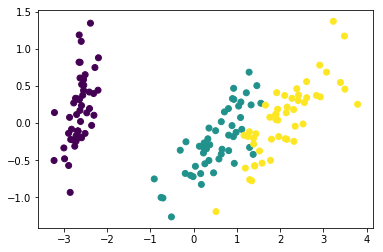

In [6]:
#例子
from sklearn.decomposition import PCA,KernelPCA
import matplotlib.pyplot as plt
import pandas as pd

category = pd.Categorical(iris.target)  #将标签量化，把字符串量化成1,2,3等
#pca_2c = PCA(n_components=2)
kpca_2c = KernelPCA(n_components=2)
x_pca_2c = kpca_2c.fit_transform(iris.data)
x_pca_2c.shape
plt.scatter(x_pca_2c[:,0],x_pca_2c[:,1],c=category.codes)
plt.show()

In [5]:
#线性判别分析法（LDA）
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#返回降维后的数据
#参数n_components为降维后的维数

LinearDiscriminantAnalysis(n_components=2).fit_transform(iris.data,iris.target)
#因为是有监督，所以需要y

array([[-8.0849532 ,  0.32845422],
       [-7.1471629 , -0.75547326],
       [-7.51137789, -0.23807832],
       [-6.83767561, -0.64288476],
       [-8.15781367,  0.54063935],
       [-7.72363087,  1.48232345],
       [-7.23514662,  0.3771537 ],
       [-7.62974497,  0.01667246],
       [-6.58274132, -0.98737424],
       [-7.36884116, -0.91362729],
       [-8.42181434,  0.67622968],
       [-7.24739721, -0.08292417],
       [-7.35062105, -1.0393597 ],
       [-7.59646896, -0.77671553],
       [-9.86936588,  1.61486093],
       [-9.18033614,  2.75558626],
       [-8.59760709,  1.85442217],
       [-7.7995682 ,  0.60905468],
       [-8.1000091 ,  0.99610981],
       [-8.04543611,  1.16244332],
       [-7.52046427, -0.156233  ],
       [-7.60526378,  1.22757267],
       [-8.70408249,  0.89959416],
       [-6.26374139,  0.46023935],
       [-6.59191505, -0.36199821],
       [-6.79210164, -0.93823664],
       [-6.84048091,  0.4848487 ],
       [-7.948386  ,  0.23871551],
       [-8.01209273,

# <font size=6 face='黑体'>数据规整：聚合、合并和重塑 

<font size=5 face='黑体'>1.层次化索引

In [1]:
import numpy as np
import pandas as pd

data = pd.Series(np.random.randn(9),
                index=[['a','a','a','b','b','c','c','d','d'],
                      [1,2,3,1,3,1,2,2,3]])
data

a  1    1.715638
   2    0.119928
   3   -0.045918
b  1    0.606534
   3    0.445260
c  1   -0.040292
   2   -1.317928
d  2   -0.229075
   3    1.010547
dtype: float64

In [2]:
data.index

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 2, 0, 2, 0, 1, 1, 2]])

In [3]:
#选取子集
data['b']

1    0.606534
3    0.445260
dtype: float64

In [4]:
data['b':'c']

b  1    0.606534
   3    0.445260
c  1   -0.040292
   2   -1.317928
dtype: float64

In [5]:
data.loc[['b','d']]

b  1    0.606534
   3    0.445260
d  2   -0.229075
   3    1.010547
dtype: float64

In [6]:
#内层选取
data.loc[:,2]

a    0.119928
c   -1.317928
d   -0.229075
dtype: float64

<font size=4 color=red face='黑体'>利用unstack可以将数据重新安排到一个DataFrame中

In [8]:
data.unstack()

,1,2,3
a,1.715638,0.119928,-0.045918
b,0.606534,NaN,0.445260
c,-0.040292,-1.317928,NaN
d,NaN,-0.229075,1.010547


In [9]:
#unstack的逆运算是stack
data.unstack().stack()

a  1    1.715638
   2    0.119928
   3   -0.045918
b  1    0.606534
   3    0.445260
c  1   -0.040292
   2   -1.317928
d  2   -0.229075
   3    1.010547
dtype: float64

In [12]:
#对于DataFrame，每条轴都可以有分层索引
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                     index=[['a','a','b','b'],[1,2,1,2]],
                     columns=[['Ohio','Ohio','Colorado'],
                             ['Green','Red','Green']])
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [13]:
#各层都可以指定名字
frame.index.names = ['key1','key2']
frame.columns.names = ['state','color']
frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [14]:
frame['Ohio']

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [17]:
#可以单独创建MultiIndex然后复用
column = pd.MultiIndex.from_arrays([['Ohio','Ohio','Colorado'],['Green','Red','Green']],
                      names=['state','color'])
#注意from_arrays和from_tuples的区别

frame2 = pd.DataFrame(np.arange(12).reshape((4,3)),
                     columns=column)
frame2

state  Ohio     Colorado
color Green Red    Green
0         0   1        2
1         3   4        5
2         6   7        8
3         9  10       11

<font size=4 face='黑体'>1.1 重排与分级排序

In [18]:
frame.swaplevel('key1','key2')  #不改变数据的顺序

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [19]:
frame.sort_index(level=1)  #改变数据顺序

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
b    1        6   7        8
a    2        3   4        5
b    2        9  10       11

In [20]:
frame.swaplevel(0,1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

<font size=4 face='黑体'>1.2 根据级别汇总统计

In [21]:
frame.sum(level='key2')

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [25]:
frame.sum(level='color',axis=1)

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

<font size=4 face='黑体'>1.3 使用DataFrame的列进行索引

In [26]:
frame = pd.DataFrame({'a':range(7),'b':range(7,0,-1),
                     'c':['one','one','one','two','two','two','two'],
                     'd':[0,1,2,0,1,2,3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [27]:
#set_index函数会将一个或多个列转化为行索引，默认情况下那些列会从DataFrame中移除，但也可以保留
frame2 = frame.set_index(['c','d'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [28]:
frame.set_index(['c','d'],drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [31]:
#reset_index的功能与set_index刚好相反
frame2.reset_index(drop=True)

,a,b
0,0,7
1,1,6
2,2,5
3,3,4
4,4,3
5,5,2
6,6,1


In [32]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


<font size=5 face='黑体'>2.合并数据集

<font size=4 face='黑体'>2.1 数据库风格的DataFrame合并

In [37]:
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],'data1':range(7)})
df2 = pd.DataFrame({'key':['a','b','d'],'data2':range(3)})
print(df1)
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   a      5
6   b      6
  key  data2
0   a      0
1   b      1
2   d      2


In [38]:
#多对一的合并
pd.merge(df1,df2,on='key')

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [39]:
#如果两个对象的列名不同，可以分别指定
df3 = pd.DataFrame({'lkey':['b','b','a','c','a','a','b'],'data1':range(7)})
df4 = pd.DataFrame({'rkey':['a','b','d'],'data2':range(3)})
pd.merge(df3,df4,left_on='lkey',right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [40]:
pd.merge(df1,df2,how='outer')  #除此以外还有：left使用左表中所有的键 ；right使用右表中所有的键

,key,data1,data2
0,b,0.0,1.0
1,b,1.0,1.0
2,b,6.0,1.0
3,a,2.0,0.0
4,a,4.0,0.0
5,a,5.0,0.0
6,c,3.0,NaN
7,d,NaN,2.0


In [41]:
#多对多的合并
df1 = pd.DataFrame({'key':['b','b','a','c','a','b'],'data1':range(6)})
df2 = pd.DataFrame({'key':['a','b','a','b','d'],'data2':range(5)})
print(df1)
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
  key  data2
0   a      0
1   b      1
2   a      2
3   b      3
4   d      4


In [42]:
pd.merge(df1,df2,on='key',how='left')

,key,data1,data2
0,b,0,1.0
1,b,0,3.0
2,b,1,1.0
3,b,1,3.0
4,a,2,0.0
5,a,2,2.0
6,c,3,NaN
7,a,4,0.0
8,a,4,2.0
9,b,5,1.0


<font size=4 face='黑体'>要根据多个健进行合并，传入一个由列名组成的列表即可

In [43]:
left = pd.DataFrame({'key1': ['foo', 'foo', 'bar'],'key2': ['one', 'two', 'one'],
                     'lval': [1, 2, 3]})
right = pd.DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                      'key2': ['one', 'one', 'one', 'two'],
                      'rval': [4, 5, 6 ,7]})
pd.merge(left,right,on=['key1','key2'],how='outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [47]:
#对重复列名的处理
pd.merge(left,right,on='key1',suffixes=('left','right'),indicator=True)  #指明每一行的来源

,key1,key2left,lval,key2right,rval,_merge
0,foo,one,1,one,4,both
1,foo,one,1,one,5,both
2,foo,two,2,one,4,both
3,foo,two,2,one,5,both
4,bar,one,3,one,6,both
5,bar,one,3,two,7,both


<font size=4 face='黑体'>2.2 索引上的合并

In [48]:
left1 = pd.DataFrame({'key':['a','b','a','a','b','c'],'value':range(6)})
right1 = pd.DataFrame({'group_val':[3.5,7]},index=['a','b'])
print(left1)
print(right1)

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
   group_val
a        3.5
b        7.0


In [49]:
pd.merge(left1,right1,left_on='key',right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [52]:
lefth = pd.DataFrame({'key1':['Ohio','Ohio','Ohio','Nevada','Nevada'],
                     'key2':[2000,2001,2002,2001,2002],'data':np.arange(5)})
righth = pd.DataFrame(np.arange(12).reshape(6,2),
                     index=[['Nevada','Nevada','Ohio','Ohio','Ohio','Ohio'],
                           [2001,2000,2000,2000,2001,2002]],
                     columns=['events1','events2'])
print(lefth)
print(righth)

     key1  key2  data
0    Ohio  2000     0
1    Ohio  2001     1
2    Ohio  2002     2
3  Nevada  2001     3
4  Nevada  2002     4
             events1  events2
Nevada 2001        0        1
       2000        2        3
Ohio   2000        4        5
       2000        6        7
       2001        8        9
       2002       10       11


In [53]:
pd.merge(lefth,righth,left_on=['key1','key2'],right_index=True)

,key1,key2,data,events1,events2
0,Ohio,2000,0,4,5
0,Ohio,2000,0,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11
3,Nevada,2001,3,0,1


In [54]:
pd.merge(lefth,righth,left_on=['key1','key2'],right_index=True,how='outer')

,key1,key2,data,events1,events2
0,Ohio,2000,0.0,4.0,5.0
0,Ohio,2000,0.0,6.0,7.0
1,Ohio,2001,1.0,8.0,9.0
2,Ohio,2002,2.0,10.0,11.0
3,Nevada,2001,3.0,0.0,1.0
4,Nevada,2002,4.0,NaN,NaN
4,Nevada,2000,NaN,2.0,3.0


<font size=4 face='黑体'>注：同时使用合并双方的索引也没问题。DataFrame还有一个便捷的join方法可以实现按索引合并（可以合并多个带有相同或相似索引的DataFrame对象，但要求没有重叠的列），且默认为左连接。

In [55]:
#join还支持在列上连接索引
left1.join(right1,on='key')

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [56]:
another = pd.DataFrame([[7,8],[9,10],[11,12],[16,17]],index=['a','c','e','f'],
                       columns=['New York','Oregon'])
left2 = pd.DataFrame([[1,2],[3,4],[5,6]],index=['a','c','e'],
                    columns=['Ohio','Nevada'])
right2 = pd.DataFrame([[7,8],[9,10],[11,12],[13,14]],index=['b','c','d','e'],
                     columns=['Missouri','Alabama'])
print(left2)
print(right2)
print(another)

   Ohio  Nevada
a     1       2
c     3       4
e     5       6
   Missouri  Alabama
b         7        8
c         9       10
d        11       12
e        13       14
   New York  Oregon
a         7       8
c         9      10
e        11      12
f        16      17


In [57]:
left2.join([right2,another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,NaN,NaN,7,8
c,3,4,9.0,10.0,9,10
e,5,6,13.0,14.0,11,12


In [58]:
left2.join([right2,another],how='outer')

H:\anaconda\lib\site-packages\pandas\core\frame.py:6359: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  verify_integrity=True)


,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1.0,2.0,NaN,NaN,7.0,8.0
b,NaN,NaN,7.0,8.0,NaN,NaN
c,3.0,4.0,9.0,10.0,9.0,10.0
d,NaN,NaN,11.0,12.0,NaN,NaN
e,5.0,6.0,13.0,14.0,11.0,12.0
f,NaN,NaN,NaN,NaN,16.0,17.0


<font size=4 face='黑体'>2.3 轴向连接

In [59]:
arr = np.arange(12).reshape(3,4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [60]:
#数组的连接方式
np.concatenate([arr,arr],axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [61]:
#Pandas中的连接方式
s1 = pd.Series([0,1],index=['a','b'])
s2 = pd.Series([2,3,4],index=['c','d','e'])
s3 = pd.Series([5,6],index=['f','g'])
pd.concat([s1,s2,s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [62]:
#concat默认在axis=0上工作，如果传入axis=1，会生成DataFrame
pd.concat([s1,s2,s3],axis=1)

H:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [63]:
s4 = pd.concat([s1,s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [64]:
pd.concat([s1,s4],axis=1)

H:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,0,1
a,0.0,0
b,1.0,1
f,NaN,5
g,NaN,6


In [65]:
pd.concat([s1,s4],axis=1,join='inner')

,0,1
a,0,0
b,1,1


In [66]:
#指定索引
pd.concat([s1,s4],axis=1,join_axes=[['a','c','b','e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,1.0
e,NaN,NaN


In [67]:
#层次化索引
result = pd.concat([s1,s2,s3],keys=['one','two','three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [68]:
result.unstack()

,a,b,c,d,e,f,g
one,0.0,1.0,NaN,NaN,NaN,NaN,NaN
two,NaN,NaN,2.0,3.0,4.0,NaN,NaN
three,NaN,NaN,NaN,NaN,NaN,5.0,6.0


In [69]:
pd.concat([s1,s2,s3],axis=1,keys=['one','two','three'])

H:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [71]:
#同样适用于DataFrame对象
df1 = pd.DataFrame(np.arange(6).reshape(3,2),index=['a','b','c'],
                  columns=['one','two'])
df2 = pd.DataFrame(5 + np.arange(4).reshape(2,2),index=['a','c'],
                  columns=['three','four'])
print(df1)
print(df2)

   one  two
a    0    1
b    2    3
c    4    5
   three  four
a      5     6
c      7     8


In [72]:
pd.concat([df1,df2],axis=1,keys=['level1','level2'])

H:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [73]:
#当传入字典时
pd.concat({'level1':df1,'level2':df2},axis=1)

H:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

<font size=4 face='黑体'>2.4 合并重叠数据

In [74]:
a = pd.Series([np.nan,2.5,np.nan,3.5,4.5,np.nan],index=['f','e','d','c','b','a'])
b = pd.Series(np.arange(len(a),dtype=np.float64),index=['f','e','d','c','b','a'])
b[-1] = np.nan
print(a)
print(b)

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64
f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64


In [75]:
np.where(pd.isnull(a),b,a)

array([0. , 2.5, 2. , 3.5, 4.5, nan])

In [76]:
#Series的combine_first方法实现同样的功能
b[:-2].combine_first(a[2:])   #用a的值填充b的缺失值

a    NaN
b    4.5
c    3.0
d    2.0
e    1.0
f    0.0
dtype: float64

In [77]:
#DataFrame的情况相同
df1 = pd.DataFrame({'a':[1,np.nan,5,np.nan],'b':[np.nan,2,np.nan,6],'c':range(2,18,4)})
df2 = pd.DataFrame({'a':[5,4,np.nan,3,7],'b':[np.nan,3,4,6,8]})
print(df1)
print(df2)

     a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14
     a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0


In [78]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


<font size=5 face='黑体'>3.重塑和轴向旋转

<font size=4 face='黑体'>3.1 重塑层次化索引

In [1]:
import numpy as np
import pandas as pd

data = pd.DataFrame(np.arange(6).reshape(2,3),
                   index=pd.Index(['Ohio','Colorado'],name='state'),
                   columns=pd.Index(['one','two','three'],name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [2]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [3]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [4]:
#默认对最内层进行操作，传入分层级别的编号或名称和对其他级别进行操作
result.unstack(0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [5]:
result.unstack('state')

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [6]:
s1 = pd.Series([0,1,2,3],index=['a','b','c','d'])
s2 = pd.Series([4,5,6],index=['c','d','e'])
data2 = pd.concat([s1,s2],keys=['one','two'])
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [7]:
data2.unstack()

,a,b,c,d,e
one,0.0,1.0,2.0,3.0,NaN
two,NaN,NaN,4.0,5.0,6.0


In [8]:
data2.unstack().stack()

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
two  c    4.0
     d    5.0
     e    6.0
dtype: float64

In [9]:
data2.unstack().stack(dropna=False)

one  a    0.0
     b    1.0
     c    2.0
     d    3.0
     e    NaN
two  a    NaN
     b    NaN
     c    4.0
     d    5.0
     e    6.0
dtype: float64

In [10]:
#进行stack操作时，作为旋转轴的级别将会成为结果中的最低级别
df = pd.DataFrame({'left':result,'right':result + 5},
                 columns=pd.Index(['left','right'],name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [11]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [12]:
#当调用stack时，可以指明轴的名字
df.unstack('state').stack('side')

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

<font size=4 face='黑体'>3.2 将“长格式”旋转为“宽格式”

In [16]:
data = pd.read_csv(r'F:\pydata-book-2nd-edition\pydata-book-2nd-edition\examples\macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [17]:
periods = pd.PeriodIndex(year=data.year,quarter=data.quarter,name='date')
columns = pd.Index(['realgdp','infl','unemp'],name='item')
data = data.reindex(columns=columns)
data.index = periods.to_timestamp('D','end')
ldata = data.stack().reset_index().rename(columns={0:'value'})

In [18]:
pivoted = ldata.pivot('date','item','value')
#前两个传递的值是行和列的索引，最后是用于填充DataFrame的数据
pivoted

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2
1960-06-30,0.14,2834.390,5.2
1960-09-30,2.70,2839.022,5.6
1960-12-31,1.21,2802.616,6.3
1961-03-31,-0.40,2819.264,6.8


In [19]:
#假设有两个需要同时重塑的数据列
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

,date,item,value,value2
0,1959-03-31,realgdp,2710.349,1.713419
1,1959-03-31,infl,0.000,2.256156
2,1959-03-31,unemp,5.800,-0.255169
3,1959-06-30,realgdp,2778.801,-0.928983
4,1959-06-30,infl,2.340,0.308881
5,1959-06-30,unemp,5.100,0.417880
6,1959-09-30,realgdp,2775.488,-1.092323
7,1959-09-30,infl,2.740,0.489235
8,1959-09-30,unemp,5.300,0.182997
9,1959-12-31,realgdp,2785.204,0.929445


In [20]:
#如果忽略最后一个参数，将得到带有层次化的列
pivoted = ldata.pivot('date','item')
pivoted[:5]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8  2.256156  1.713419 -0.255169
1959-06-30  2.34  2778.801   5.1  0.308881 -0.928983  0.417880
1959-09-30  2.74  2775.488   5.3  0.489235 -1.092323  0.182997
1959-12-31  0.27  2785.204   5.6  0.703642  0.929445  1.875722
1960-03-31  2.31  2847.699   5.2  1.331201  1.793840 -0.443674

In [21]:
pivoted['value'][:5]

item,infl,realgdp,unemp
date,,,
1959-03-31,0.00,2710.349,5.8
1959-06-30,2.34,2778.801,5.1
1959-09-30,2.74,2775.488,5.3
1959-12-31,0.27,2785.204,5.6
1960-03-31,2.31,2847.699,5.2


In [22]:
#pivot其实就是用set_index创建层次化索引再用unstack重塑
unstacked = ldata.set_index(['date','item']).unstack('item')
unstacked[:7]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8  2.256156  1.713419 -0.255169
1959-06-30  2.34  2778.801   5.1  0.308881 -0.928983  0.417880
1959-09-30  2.74  2775.488   5.3  0.489235 -1.092323  0.182997
1959-12-31  0.27  2785.204   5.6  0.703642  0.929445  1.875722
1960-03-31  2.31  2847.699   5.2  1.331201  1.793840 -0.443674
1960-06-30  0.14  2834.390   5.2  0.269352  0.358104 -1.946358
1960-09-30  2.70  2839.022   5.6  0.178704 -0.544610  0.306352

<font size=4 font='黑体'>3.3 将“宽格式”旋转为“长格式”

In [23]:
df = pd.DataFrame({'key':['foo','bar','baz'],'A':[1,2,3],'B':[4,5,6],
                  'C':[7,8,9]})
df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [24]:
#使用pandas.melt时，必须指明哪些列是分组指标
melted = pd.melt(df,['key'])
melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [25]:
reshaped = melted.pivot('key','variable','value')
reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [26]:
#可以使用reset_index将行索引数据移回列
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [28]:
#指定子集
pd.melt(df,id_vars=['key'],value_vars=['A','B'])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [29]:
#也可以不用分组指标
pd.melt(df,value_vars=['A','B','C'])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [30]:
pd.melt(df,value_vars=['key','A','B'])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


<font size=4 color=red face='黑体'>注：set_index:从DataFrame中选取列作为索引，并默认将该列删除；reset_index:设置新的默认索引，并默认将原索引数据移回列；reindex:创建一个新索引的新对象，并可以重新排序，缺失值用NaN填补

In [31]:
#reindex
se1 = pd.Series([1,7,3,9],index=['d','c','a','f'])
se1

d    1
c    7
a    3
f    9
dtype: int64

In [32]:
se2 = se1.reindex(['a','b','c','d','e','f'])
se2
#传入method=''来选择插值方式（ffill、bfill等）；DataFrame中也可以使用fill_value=n

a    3.0
b    NaN
c    7.0
d    1.0
e    NaN
f    9.0
dtype: float64

# <font size=6 face='黑体'>数据聚合与分组运算

<font size=5 face='黑体'>1.GroupBy机制

In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'key1':['a','a','b','b','a'],
                  'key2':['one','two','one','two','one'],
                  'data1':np.random.randn(5),'data2':np.random.rand(5)})
df

,key1,key2,data1,data2
0,a,one,0.298777,0.500870
1,a,two,-0.229796,0.938649
2,b,one,1.495833,0.024491
3,b,two,0.263845,0.853853
4,a,one,0.006612,0.240708


In [3]:
#按key1进行分组，并计算data1列的平均值
grouped = df['data1'].groupby(df['key1'])
grouped

In [4]:
#变量grouped是一个GroupBy对象，只含有分组信息的中间数据，还未进行任何计算
grouped.mean()

key1
a    0.025198
b    0.879839
Name: data1, dtype: float64

In [5]:
#如果一次传入多个数组的列表
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.152695
      two    -0.229796
b     one     1.495833
      two     0.263845
Name: data1, dtype: float64

In [6]:
#分组健除了为Series，还可以是任何长度适当的数组
states = np.array(['Ohio','California','California','Ohio','Ohio'])
years = np.array([2005,2005,2006,2005,2006])
df['data1'].groupby([states,years]).mean()

California  2005   -0.229796
            2006    1.495833
Ohio        2005    0.281311
            2006    0.006612
Name: data1, dtype: float64

In [7]:
#还可以将DataFrame的列名用作分组健
df.groupby('key1').mean()
#由于‘key2’列不是数值列（俗称‘麻烦列’）所以结果被排除了

,data1,data2
key1,,
a,0.025198,0.560076
b,0.879839,0.439172


In [8]:
df.groupby(['key1','key2']).mean()

data1     data2
key1 key2                    
a    one   0.152695  0.370789
     two  -0.229796  0.938649
b    one   1.495833  0.024491
     two   0.263845  0.853853

In [10]:
#size方法：返回一个含有分组大小的Series
df.groupby(['key1','key2']).size()
#注意任何分组中的缺失值都会被从结果中除去

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

<font size=4 face='黑体'>1.1 对分组进行迭代

In [11]:
#GroupBy对象支持迭代
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  0.298777  0.500870
1    a  two -0.229796  0.938649
4    a  one  0.006612  0.240708
b
  key1 key2     data1     data2
2    b  one  1.495833  0.024491
3    b  two  0.263845  0.853853


In [12]:
for (k1,k2),group in df.groupby(['key1','key2']):
    print((k1,k2))
    print(group)

('a', 'one')
  key1 key2     data1     data2
0    a  one  0.298777  0.500870
4    a  one  0.006612  0.240708
('a', 'two')
  key1 key2     data1     data2
1    a  two -0.229796  0.938649
('b', 'one')
  key1 key2     data1     data2
2    b  one  1.495833  0.024491
('b', 'two')
  key1 key2     data1     data2
3    b  two  0.263845  0.853853


In [13]:
#将数据片段做成一个字典
pieces = dict(list(df.groupby('key1')))
pieces

{'a':   key1 key2     data1     data2
 0    a  one  0.298777  0.500870
 1    a  two -0.229796  0.938649
 4    a  one  0.006612  0.240708, 'b':   key1 key2     data1     data2
 2    b  one  1.495833  0.024491
 3    b  two  0.263845  0.853853}

In [14]:
#对列进行分组：根据dtype
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [15]:
grouped = df.groupby(df.dtypes,axis=1)

In [16]:
for dtype,group in grouped:
    print(dtype)
    print(group)

float64
      data1     data2
0  0.298777  0.500870
1 -0.229796  0.938649
2  1.495833  0.024491
3  0.263845  0.853853
4  0.006612  0.240708
object
  key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one


<font size=4 face='黑体'>1.2 选取一列或列的子集

In [17]:
df.groupby(['key1','key2'])[['data2']].mean()

data2
key1 key2          
a    one   0.370789
     two   0.938649
b    one   0.024491
     two   0.853853

In [19]:
s_grouped = df.groupby(['key1','key2'])['data2'].mean()
s_grouped

key1  key2
a     one     0.370789
      two     0.938649
b     one     0.024491
      two     0.853853
Name: data2, dtype: float64

<font size=4 face='黑体'>1.3 通过字典或Series进行分组

In [21]:
people = pd.DataFrame(np.random.randn(5,5),
                     columns=['a','b','c','d','e'],
                     index=['Joe','Steve','Wes','Jim','Travis'])
people.iloc[2:3,[1,2]] = np.nan
people

,a,b,c,d,e
Joe,-0.470430,-0.228498,-1.182643,-0.930198,0.678182
Steve,-0.684691,0.394396,-1.583134,-0.472940,0.084081
Wes,-0.307161,NaN,NaN,0.284564,-0.679690
Jim,-1.647051,-1.213315,-0.838578,-0.616837,-1.567517
Travis,-0.386746,0.232867,-0.363209,1.440561,-0.832573


In [22]:
mapping = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}

In [23]:
#可以直接传递字典给GroupBy（存在未使用的分组健是可以的，如这里的‘f’）
by_column = people.groupby(mapping,axis=1)
by_column.sum()

,blue,red
Joe,-2.112841,-0.020746
Steve,-2.056074,-0.206214
Wes,0.284564,-0.986852
Jim,-1.455415,-4.427883
Travis,1.077351,-0.986452


In [24]:
#Series也有同样的功能、
map_series = pd.Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [25]:
people.groupby(map_series,axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


<font size=4 face='黑体'>1.4 通过函数进行分组

In [26]:
people.groupby(len).sum()

,a,b,c,d,e
3,-2.424642,-1.441813,-2.021221,-1.262471,-1.569026
5,-0.684691,0.394396,-1.583134,-0.472940,0.084081
6,-0.386746,0.232867,-0.363209,1.440561,-0.832573


In [27]:
#将函数跟数组、列表、字典、Series混合使用也不是问题，因为任何东西在内部都会被转换为数组
key_list = ['one','one','one','two','two']
people.groupby([len,key_list]).min()

a         b         c         d         e
3 one -0.470430 -0.228498 -1.182643 -0.930198 -0.679690
  two -1.647051 -1.213315 -0.838578 -0.616837 -1.567517
5 one -0.684691  0.394396 -1.583134 -0.472940  0.084081
6 two -0.386746  0.232867 -0.363209  1.440561 -0.832573

<font size=4 face='黑体'>1.5 根据索引级别分组

In [29]:
columns = pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],[1,3,5,1,3]],
                                  names=['cty','tenor'])
hier_df = pd.DataFrame(np.random.randn(4,5),columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.535914 -0.785540  0.642984 -1.068924 -0.475335
1      0.252717 -0.859246 -3.084912  0.903566  1.074688
2     -1.167615 -0.443172 -1.899998 -0.023500  0.836315
3      1.299083  0.386110 -0.920914 -0.391633 -0.704237

In [30]:
hier_df.groupby(level='cty',axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


<font size=5 face='黑体'>2.数据聚合

In [31]:
df

,key1,key2,data1,data2
0,a,one,0.298777,0.500870
1,a,two,-0.229796,0.938649
2,b,one,1.495833,0.024491
3,b,two,0.263845,0.853853
4,a,one,0.006612,0.240708


In [32]:
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    0.240344
b    1.372635
Name: data1, dtype: float64

In [33]:
#使用自己的聚合函数 :将其传入aggregate或agg方法即可
def peak_to_peak(arr):
    return arr.max() - arr.min()
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,0.528573,0.697941
b,1.231988,0.829361


In [34]:
#有些并非聚合运算的方法也可以使用
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.025198  0.264776 -0.229796 -0.111592  0.006612  0.152695   
b      2.0  0.879839  0.871147  0.263845  0.571842  0.879839  1.187836   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.298777   3.0  0.560076  0.352717  0.240708  0.370789  0.500870   
b     1.495833   2.0  0.439172  0.586447  0.024491  0.231832  0.439172   

                          
           75%       max  
key1                      
a     0.719760  0.938649  
b     0.646512  0.853853

<font size=4 face='黑体'>2.1 面向列的多函数应用

In [25]:
tips = pd.read_csv(r'F:\pydata-book-2nd-edition\pydata-book-2nd-edition\examples\tips.csv')
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [36]:
grouped = tips.groupby(['day','smoker'])
grouped_pct = grouped['tip_pct']
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [37]:
#传入一组聚合函数时
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [38]:
grouped_pct.agg([('foo','mean'),('bar','std')])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [39]:
functions = ['count','mean','max']
result = grouped['tip_pct','total_bill'].agg(functions)
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [40]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [41]:
ftuples = [('Durchschnitt','mean'),('Abweichung','var')]
grouped['tip_pct','total_bill'].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

In [42]:
#对不同的列应用不同的聚合函数：传入一个列明映射到函数的字典
grouped.agg({'tip':'max','size':'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [43]:
grouped.agg({'tip_pct':['min','max','mean'],'size':'sum'})

tip_pct                     size
                  min       max      mean  sum
day  smoker                                   
Fri  No      0.120385  0.187735  0.151650    9
     Yes     0.103555  0.263480  0.174783   31
Sat  No      0.056797  0.291990  0.158048  115
     Yes     0.035638  0.325733  0.147906  104
Sun  No      0.059447  0.252672  0.160113  167
     Yes     0.065660  0.710345  0.187250   49
Thur No      0.072961  0.266312  0.160298  112
     Yes     0.090014  0.241255  0.163863   40

<font size=4 face='黑体'>2.2 以“没有行索引”的形式返回聚合数据

In [44]:
tips.groupby(['day','smoker'],as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


<font size=5 face='黑体'>3.apply：一般性的“拆分-应用-合并”

In [45]:
def top(df,n=5,column='tip_pct'):
    return df.sort_values(by=column)[-n:]
top(tips,n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [46]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [48]:
tips.groupby(['smoker','day']).apply(top,n=2,column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  91        22.49   3.50     No   Fri  Dinner     2  0.155625
            94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  59        48.27   6.73     No   Sat  Dinner     4  0.139424
            212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  112       38.07   4.00     No   Sun  Dinner     3  0.105070
            156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 85        34.83   5.17     No  Thur   Lunch     4  0.148435
            142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  90        28.97   3.00    Yes   Fri  Dinner     2  0.103555
            95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
            170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  184       40.55   3.00    Yes   Sun  Dinner     2  0.073983
            182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 83        32.68   5.00    Yes  Thur   Lunch     2  0.152999
            197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [50]:
#直接调用像describe这样的函数只是apply方法的简化
result = tips.groupby('smoker')['tip_pct'].describe()
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [51]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [52]:
result.T

smoker,No,Yes
count,151.000000,93.000000
mean,0.159328,0.163196
std,0.039910,0.085119
min,0.056797,0.035638
25%,0.136906,0.106771
50%,0.155625,0.153846
75%,0.185014,0.195059
max,0.291990,0.710345


<font size=4 face='黑体'>3.1 禁止分组健

In [53]:
#取消分组健形成的层次化索引
tips.groupby('smoker',group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


<font size=4 face='黑体'>3.2 分位数和桶分析

In [1]:
import numpy as np
import pandas as pd

frame = pd.DataFrame({'data1':np.random.randn(1000),'data2':np.random.randn(1000)})
quartiles = pd.cut(frame.data1,4)
quartiles[:10]

0     (-1.327, 0.212]
1    (-2.873, -1.327]
2     (-1.327, 0.212]
3    (-2.873, -1.327]
4     (-1.327, 0.212]
5     (-1.327, 0.212]
6     (-1.327, 0.212]
7     (-1.327, 0.212]
8     (-1.327, 0.212]
9      (0.212, 1.752]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-2.873, -1.327] < (-1.327, 0.212] < (0.212, 1.752] < (1.752, 3.291]]

In [2]:
#由data1的cut产生的category可以直接传递给GroupBy，进而对data2列做一些统计计算
def get_stats(group):
    return {'min':group.min(),'max':group.max(),'count':group.count(),
           'mean':group.mean()}
grouped = frame.data2.groupby(quartiles)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.873, -1.327]",104.0,2.318891,-0.027357,-1.994747
"(-1.327, 0.212]",501.0,3.094063,0.002296,-3.009005
"(0.212, 1.752]",353.0,3.058273,-0.016376,-3.134651
"(1.752, 3.291]",42.0,1.555818,-0.042626,-2.416135


In [3]:
grouping = pd.qcut(frame.data1,10,labels=False)   #只获得分位数的编号
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.318891,-0.015748,-1.994747
1,100.0,2.725050,-0.001577,-2.521341
2,100.0,2.634673,-0.040651,-2.663391
3,100.0,2.163829,-0.141073,-2.791968
4,100.0,3.094063,0.037517,-3.009005
5,100.0,2.731699,0.086006,-2.909521
6,100.0,2.475544,0.081874,-2.462258
7,100.0,3.058273,0.099094,-1.889350
8,100.0,2.620975,-0.140084,-3.134651


<font size=4 face='黑体'>3.3 示例：用特定于分组的值填充缺失值

In [4]:
s = pd.Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -0.710743
2         NaN
3    0.172584
4         NaN
5   -1.425886
dtype: float64

In [5]:
s.fillna(s.mean())

0   -0.654681
1   -0.710743
2   -0.654681
3    0.172584
4   -0.654681
5   -1.425886
dtype: float64

In [7]:
#对不同的分组填充不同的值
states = ['Ohio','New York','Vermont','Florida','Oregon','Nevada','California','Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = pd.Series(np.random.randn(8),index=states)
#设立一些缺失值
data[['Vermont','Nevada','Idaho']]=np.nan
data

Ohio          0.247075
New York      0.395626
Vermont            NaN
Florida      -0.663192
Oregon        1.106344
Nevada             NaN
California    0.507667
Idaho              NaN
dtype: float64

In [8]:
data.groupby(group_key).mean()

East   -0.006831
West    0.807006
dtype: float64

In [9]:
f = lambda x:x.fillna(x.mean())

data.groupby(group_key).apply(f)

Ohio          0.247075
New York      0.395626
Vermont      -0.006831
Florida      -0.663192
Oregon        1.106344
Nevada        0.807006
California    0.507667
Idaho         0.807006
dtype: float64

In [10]:
#也可以根据分组的name属性来预定义填充值
fill_values = {'East':0.5,'West':-1}
fill_func = lambda g:g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio          0.247075
New York      0.395626
Vermont       0.500000
Florida      -0.663192
Oregon        1.106344
Nevada       -1.000000
California    0.507667
Idaho        -1.000000
dtype: float64

<font size=4 face='黑体'>3.4 示例：随机采样和排列

In [13]:
def draw(a,n):
    return a.sample(n)
s = pd.Series(np.random.randn(8),index=['a','b','b','b','a','a','b','a'])
s.groupby(s.index).apply(draw,n=2)

a  a   -0.805678
   a    1.533125
b  b    0.142467
   b    0.766891
dtype: float64

<font size=4 face='黑体'>3.5 示例：分组加权平均数和相关系数

In [14]:
df = pd.DataFrame({'category':['a','a','a','a','b','b','b','b'],
                  'data':np.random.randn(8),'weight':np.random.rand(8)})
df

,category,data,weight
0,a,-0.452021,0.340283
1,a,-1.067817,0.458226
2,a,-0.288939,0.041457
3,a,-0.189920,0.774108
4,b,-0.596123,0.439199
5,b,-1.128952,0.363796
6,b,-0.914019,0.873759
7,b,0.110972,0.199528


In [15]:
#计算分组加权平均数
grouped = df.groupby('category')
get_wavg = lambda g:np.average(g['data'],weights=g['weight'])
grouped.apply(get_wavg)

category
a   -0.49695
b   -0.77228
dtype: float64

In [16]:
close_px = pd.read_csv(r'F:\pydata-book-2nd-edition\pydata-book-2nd-edition\examples\stock_px_2.csv',
                      parse_dates=True,index_col=0)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
AAPL    2214 non-null float64
MSFT    2214 non-null float64
XOM     2214 non-null float64
SPX     2214 non-null float64
dtypes: float64(4)
memory usage: 86.5 KB


In [17]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [18]:
#每列和SPX列的成对相关系数函数
spx_corr = lambda x:x.corrwith(x['SPX'])

In [19]:
#使用pct_change计算百分比变化
rets = close_px.pct_change().dropna()

In [20]:
get_year = lambda x:x.year
by_year = rets.groupby(get_year)
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [21]:
#计算列与列之间的相关系数
by_year.apply(lambda x:x['AAPL'].corr(x['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

<font size=4 face='黑体'>3.6 示例：组级别的线性回归

In [22]:
import statsmodels.api as sm
def regress(data,yvar,xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1
    result = sm.OLS(Y,X).fit()
    return result.params

In [23]:
#按年计算AAPL对SPX收益率的线性回归
by_year.apply(regress,'AAPL',['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


<font size=5 face='黑体'>4.透视表和交叉表（pivot table & crosstab）

<font size=4 face='黑体'>4.1 pivot table

In [26]:
#pivot_table的默认聚合类型为计算分组平均数
tips.pivot_table(index=['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [27]:
tips.pivot_table(['tip_pct','size'],index=['time','day'],columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [28]:
#传入margins=True添加分项小计：all值为不考虑分组的平均值
tips.pivot_table(['tip_pct','size'],index=['time','day'],columns='smoker',margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [29]:
#使用count或len可以得到分组大小
tips.pivot_table('tip_pct',index=['time','smoker'],columns='day',aggfunc=len,
                margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [30]:
#填补缺失值
tips.pivot_table('tip_pct',index=['time','size','smoker'],columns='day',
                aggfunc='mean',fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

<font size=4 face='黑体'>4.2 crosstab（用于计算分组大小的特殊透视表）

In [32]:
data = pd.DataFrame({'Sample':np.arange(1,11),
                    'Nationality':['USA','Japan','USA','Japan','Japan','Japan',
                                  'USA','USA','Japan','USA'],
                    'Handedness':['Right-handed','Left-handed','Right-handed',
                                 'Right-handed','Left-handed','Right-handed',
                                  'Right-handed','Left-handed',
                                 'Right-handed','Right-handed',]})
data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [33]:
pd.crosstab(data.Nationality,data.Handedness,margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [34]:
#crosstab的前两个参数可以是数组或Series，或者是数组列表
pd.crosstab([tips.time,tips.day],tips.smoker,margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# <font size=6 face='黑体'>时间序列

<font size=5 face='黑体'>1.日期和时间数据类型及工具

In [12]:
from datetime import datetime

now = datetime.now()
now

datetime.datetime(2019, 1, 23, 15, 33, 55, 702156)

In [2]:
now.year,now.month,now.day

(2019, 1, 23)

In [3]:
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)
delta
#表示926天又56700秒

datetime.timedelta(926, 56700)

In [6]:
delta.days,delta.seconds

(926, 56700)

In [7]:
#可以给datetime对象加上或减去一个或多个timedelta
from datetime import timedelta

start = datetime(2011,1,7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

<font size=4 face='黑体'>1.1 字符串和datetime的相互转换

In [9]:
stamp = datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [10]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [14]:
value = '2011-01-03'
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
datestrs = ['7/6/2011','8/6/2011']
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [17]:
#方便的日期解析的包
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
parse('Jan 30,1997 10:45 PM')

datetime.datetime(2019, 1, 30, 22, 45)

In [19]:
#当日出现在月前面
parse('6/12/2011',dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [20]:
#pandas通常用于处理成组的日期，to_datetime可以解析多种不同的日期表示形式
import pandas as pd
datestrs = ['2011-07-06 12:00:00','2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [21]:
#还可以处理缺失值
idx = pd.to_datetime(datestrs + [None])
idx
#NaT:Not a Time

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [22]:
pd.isnull(idx)

array([False, False,  True])

<font size=5 face='黑体'>2.时间序列基础

In [24]:
import numpy as np
dates = [datetime(2011,1,2),datetime(2011,1,5),datetime(2011,1,7),
        datetime(2011,1,8),datetime(2011,1,10),datetime(2011,1,12)]
ts = pd.Series(np.random.randn(6),index=dates)
ts

2011-01-02   -0.082856
2011-01-05   -0.354081
2011-01-07   -0.105502
2011-01-08   -0.317905
2011-01-10   -0.052096
2011-01-12   -1.231078
dtype: float64

In [25]:
#DatetimeIndex中的各个标量值是pandas的Timestamp对象
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [26]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

<font size=4 face='黑体'>2.1 索引、选取、子集构造

In [27]:
stamp = ts.index[2]
ts[stamp]

-0.10550171098707913

In [28]:
#或者直接传入表示日期的字符串
ts['1/10/2011'],ts['20110110']

(-0.05209579037302051, -0.05209579037302051)

In [29]:
#对于较长的时间序列，只需传入年或年月就可以轻松切片
longer_ts =  pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2000',periods=1000))
longer_ts

2000-01-01    1.054909
2000-01-02   -0.503898
2000-01-03   -2.025679
2000-01-04    0.686920
2000-01-05    1.300748
2000-01-06    0.121621
2000-01-07    1.278741
2000-01-08   -1.328390
2000-01-09    0.687594
2000-01-10    1.503761
2000-01-11    0.637074
2000-01-12    1.012519
2000-01-13   -1.350656
2000-01-14   -0.571165
2000-01-15    1.649428
2000-01-16   -0.775328
2000-01-17    0.606341
2000-01-18   -1.089378
2000-01-19    0.133225
2000-01-20   -0.620815
2000-01-21    0.051561
2000-01-22   -0.085127
2000-01-23    1.101327
2000-01-24   -2.516120
2000-01-25   -0.206043
2000-01-26    0.114841
2000-01-27    0.231920
2000-01-28   -0.058862
2000-01-29   -0.036389
2000-01-30    2.238682
                ...   
2002-08-28   -0.650260
2002-08-29    1.762977
2002-08-30   -0.866467
2002-08-31    0.722201
2002-09-01    1.466479
2002-09-02   -0.342493
2002-09-03    0.024554
2002-09-04   -2.739875
2002-09-05   -0.884204
2002-09-06    1.512315
2002-09-07    1.896000
2002-09-08   -1.310863
2002-09-09 

In [30]:
longer_ts['2001']

2001-01-01    1.974632
2001-01-02   -1.474124
2001-01-03    0.562569
2001-01-04   -1.920018
2001-01-05    0.816138
2001-01-06    0.427942
2001-01-07    0.233993
2001-01-08    0.183411
2001-01-09    0.212278
2001-01-10   -1.642610
2001-01-11    0.965569
2001-01-12   -0.118285
2001-01-13    0.807360
2001-01-14    0.331572
2001-01-15   -1.631920
2001-01-16    0.441457
2001-01-17    1.098153
2001-01-18    1.316336
2001-01-19   -0.102408
2001-01-20    0.167180
2001-01-21   -0.841963
2001-01-22   -0.181888
2001-01-23   -1.208229
2001-01-24   -0.569316
2001-01-25   -0.886262
2001-01-26    0.855853
2001-01-27   -0.069353
2001-01-28   -2.888140
2001-01-29   -2.586611
2001-01-30   -0.345559
                ...   
2001-12-02   -1.255276
2001-12-03    0.315574
2001-12-04    1.041693
2001-12-05   -0.473393
2001-12-06    0.463647
2001-12-07    0.563061
2001-12-08    2.037272
2001-12-09    1.044575
2001-12-10    0.247204
2001-12-11    1.921532
2001-12-12   -0.823544
2001-12-13    0.370727
2001-12-14 

In [31]:
longer_ts['2001-05']

2001-05-01    0.092380
2001-05-02    0.430363
2001-05-03    0.436415
2001-05-04   -1.712795
2001-05-05    0.643323
2001-05-06    1.103802
2001-05-07   -0.505383
2001-05-08   -1.143211
2001-05-09   -1.110505
2001-05-10    1.767469
2001-05-11   -0.147826
2001-05-12   -1.303056
2001-05-13    3.203833
2001-05-14    0.927386
2001-05-15    0.245303
2001-05-16   -0.733840
2001-05-17    0.622949
2001-05-18    1.247231
2001-05-19   -0.286804
2001-05-20    1.171426
2001-05-21   -0.122753
2001-05-22   -0.280492
2001-05-23   -0.001616
2001-05-24   -1.677003
2001-05-25    1.552198
2001-05-26    0.248630
2001-05-27   -0.488551
2001-05-28    0.280028
2001-05-29   -0.245899
2001-05-30   -0.883828
2001-05-31   -0.800106
Freq: D, dtype: float64

In [32]:
#datetime对象也可以进行切片
ts[datetime(2011,1,7):]

2011-01-07   -0.105502
2011-01-08   -0.317905
2011-01-10   -0.052096
2011-01-12   -1.231078
dtype: float64

In [33]:
#也可以用不存在于该时间序列中的时间戳进行切片（即范围查询）
#可以传入字符串日期、datetime或Timestamp
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.105502
2011-01-08   -0.317905
2011-01-10   -0.052096
dtype: float64

<font size=4 color=red face='黑体'>注意：切片产生的是原时间序列的视图，与 numpy的切片一样，没有数据被复制，对切片进行修改 会反映到原始数据上

In [34]:
#还有一个等价的实例方法
ts.truncate(after='1/9/2011')

2011-01-02   -0.082856
2011-01-05   -0.354081
2011-01-07   -0.105502
2011-01-08   -0.317905
dtype: float64

In [35]:
dates = pd.date_range('1/1/2000',periods=100,freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100,4),index=dates,columns=['A','B','C','D'])
long_df.loc['5-2001']

,A,B,C,D
2001-05-02,1.066809,-1.111746,0.742813,-1.567029
2001-05-09,2.030420,2.151324,0.363870,-0.692128
2001-05-16,-0.369254,0.059648,-0.312866,1.202149
2001-05-23,-1.046434,-0.403210,-0.562877,-0.921412
2001-05-30,1.183416,-0.515639,-0.418703,0.022790


<font size=4 face='黑体'>2.2 带有重复索引的时间序列

In [36]:
dates = pd.DatetimeIndex(['1/1/2000','1/2/2000','1/2/2000','1/2/2000','1/3/2000'])
dup_ts = pd.Series(np.arange(5),index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [37]:
dup_ts.index.is_unique

False

In [38]:
dup_ts['1/3/2000']

4

In [39]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [40]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [41]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

<font size=5 face='黑体'>3.日期的范围、频率以及移动

In [42]:
#生成固定频率，D表示每天
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

<font size=4 face='黑体'>3.1 生成日期范围

In [43]:
index = pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [44]:
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range(end='2012-06-01',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [46]:
#BM表示每月最后一个工作日
pd.date_range('2000-01-01','2000-12-01',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [47]:
#规范化到午夜
pd.date_range('2012-05-02 12:56:31',periods=5,normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

<font size=4 face='黑体'>3.2 频率和日期偏移量

In [48]:
#基础频率对应的日期偏移量
from pandas.tseries.offsets import Hour,Minute
hour = Hour()
hour

<Hour>

In [49]:
four_hour = Hour(4)
four_hour

<4 * Hours>

In [50]:
#一般来说无需创建这样的对象
pd.date_range('2000-01-01','2000-01-03 23:59',freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [51]:
#大部分偏移量都可以通过加法连接
Hour(2) + Minute(30)

<150 * Minutes>

In [52]:
pd.date_range('2000-01-01',periods=10,freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

<font size=4 face='黑体'>3.3 WOM日期（Week Of Month）

In [54]:
rng = pd.date_range('2012-01-01','2012-09-01',freq='WOM-3FRI')  #每月第3个星期五
#list(rng)
rng

DatetimeIndex(['2012-01-20', '2012-02-17', '2012-03-16', '2012-04-20',
               '2012-05-18', '2012-06-15', '2012-07-20', '2012-08-17'],
              dtype='datetime64[ns]', freq='WOM-3FRI')

<font size=4 face='黑体'>3.4 移动（超前和滞后）数据

In [55]:
ts = pd.Series(np.random.randn(4),index=pd.date_range('1/1/2000',periods=4,freq='M'))
ts

2000-01-31   -0.576791
2000-02-29   -2.415490
2000-03-31    0.770897
2000-04-30    0.828763
Freq: M, dtype: float64

In [56]:
ts.shift(2)   #所有数据往后移2行

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.576791
2000-04-30   -2.415490
Freq: M, dtype: float64

In [57]:
ts.shift(-2)  #所有数据前移2行

2000-01-31    0.770897
2000-02-29    0.828763
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [58]:
#shift通常用来计算百分比变化，可以这样表达：
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    3.187812
2000-03-31   -1.319147
2000-04-30    0.075063
Freq: M, dtype: float64

In [59]:
#同时对时间戳进行位移
ts.shift(2,freq='M')

2000-03-31   -0.576791
2000-04-30   -2.415490
2000-05-31    0.770897
2000-06-30    0.828763
Freq: M, dtype: float64

In [60]:
#还可以使用其他频率,可以灵活地进行移动
ts.shift(3,freq='D')

2000-02-03   -0.576791
2000-03-03   -2.415490
2000-04-03    0.770897
2000-05-03    0.828763
dtype: float64

In [61]:
ts.shift(1,freq='90T')

2000-01-31 01:30:00   -0.576791
2000-02-29 01:30:00   -2.415490
2000-03-31 01:30:00    0.770897
2000-04-30 01:30:00    0.828763
Freq: M, dtype: float64

<font size=4 face='黑体'>3.5 通过偏移量对日期进行位移

In [62]:
from pandas.tseries.offsets import Day,MonthEnd

now = datetime(2011,11,17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [63]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [64]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [65]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [66]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [68]:
ts = pd.Series(np.random.randn(8),index=pd.date_range('1/15/2000',periods=8,freq='8d'))
ts

2000-01-15   -1.743930
2000-01-23    0.784222
2000-01-31   -1.424215
2000-02-08   -0.307564
2000-02-16   -0.256358
2000-02-24   -0.175037
2000-03-03   -1.183040
2000-03-11    2.093591
Freq: 8D, dtype: float64

In [69]:
#通过GroupBy和MonthEnd的巧妙结合计算每月平均值
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.794641
2000-02-29   -0.246320
2000-03-31    0.455275
dtype: float64

In [70]:
#更快速的方法:resample
ts.resample('M').mean()

2000-01-31   -0.794641
2000-02-29   -0.246320
2000-03-31    0.455275
Freq: M, dtype: float64

<font size=5 face='黑体'>4.时区处理

In [71]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [72]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

<font size=4 face='黑体'>4.1 时区本地化和转换

In [73]:
rng = pd.date_range('3/9/2012 9:30',periods=6,freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-09 09:30:00   -0.169780
2012-03-10 09:30:00   -1.408127
2012-03-11 09:30:00   -0.118765
2012-03-12 09:30:00   -0.831019
2012-03-13 09:30:00   -0.413323
2012-03-14 09:30:00   -0.930566
Freq: D, dtype: float64

In [74]:
print(ts.index.tz)

None


In [75]:
pd.date_range('3/9/2012 9:30',periods=10,freq='D',tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [76]:
#从单纯到本地化：tz_localize
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.169780
2012-03-10 09:30:00+00:00   -1.408127
2012-03-11 09:30:00+00:00   -0.118765
2012-03-12 09:30:00+00:00   -0.831019
2012-03-13 09:30:00+00:00   -0.413323
2012-03-14 09:30:00+00:00   -0.930566
Freq: D, dtype: float64

In [77]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [78]:
#当时间序列被本地化到某个特定时区，就可以用tz_convert转换到其它时区了
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.169780
2012-03-10 04:30:00-05:00   -1.408127
2012-03-11 05:30:00-04:00   -0.118765
2012-03-12 05:30:00-04:00   -0.831019
2012-03-13 05:30:00-04:00   -0.413323
2012-03-14 05:30:00-04:00   -0.930566
Freq: D, dtype: float64

In [79]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

<font size=4 face='黑体'>4.2 操作时区意识型Timestamp对象

In [80]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [81]:
#创建Timestamp时也可以传入时区信息
stamp_moscow = pd.Timestamp('2011-01-12 04:00',tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-01-12 04:00:00+0300', tz='Europe/Moscow')

<font size=4 face='黑体'>4.3 不同时区之间的运算

In [82]:
#当合并两个不同时区的时间序列时，结果是UTC
rng = pd.date_range('3/7/2012 9:30',periods=10,freq='B')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2012-03-07 09:30:00   -0.475272
2012-03-08 09:30:00    0.132675
2012-03-09 09:30:00    1.155691
2012-03-12 09:30:00    0.160479
2012-03-13 09:30:00    0.858222
2012-03-14 09:30:00   -0.430025
2012-03-15 09:30:00   -1.379675
2012-03-16 09:30:00    0.308199
2012-03-19 09:30:00    0.563753
2012-03-20 09:30:00    0.661031
Freq: B, dtype: float64

In [83]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 =  ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

<font size=5 face='黑体'>5.时期及其算术运算

In [1]:
#时期（Period）表示的是时间区间
import numpy as np
import pandas as pd

p = pd.Period(2017,freq='A-DEC')
p

Period('2017', 'A-DEC')

In [2]:
#根据频率进行位移
p + 2 , p - 5

(Period('2019', 'A-DEC'), Period('2012', 'A-DEC'))

In [3]:
#当两个Period对象拥有相同的频率
p - pd.Period('2014',freq='A-DEC')

3

In [4]:
rng = pd.period_range('2000-01-01','2000-06-30',freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [5]:
pd.Series(np.random.randn(6),index=rng)

2000-01   -1.624531
2000-02    0.338168
2000-03   -0.667991
2000-04   -1.150646
2000-05   -1.303337
2000-06    0.509277
Freq: M, dtype: float64

In [6]:
values = ['2001Q3','2002Q2','2003Q1']
index = pd.PeriodIndex(values,freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

<font size=4 face='黑体'>5.1 时期的频率转换

In [7]:
#将年度时期转换为当年年初或年末的月度时期
p = pd.Period('2007',freq='A-DEC')
p

Period('2007', 'A-DEC')

In [8]:
p.asfreq('M',how='start')

Period('2007-01', 'M')

In [9]:
p.asfreq('M',how='end')

Period('2007-12', 'M')

In [10]:
#对于不以12月结束的财政年度，月度子时期的归属情况就不同了
p = pd.Period('2007',freq='A-JUN')
p

Period('2007', 'A-JUN')

In [11]:
p.asfreq('M','start')

Period('2006-07', 'M')

In [12]:
p.asfreq('M','end')

Period('2007-06', 'M')

In [13]:
#超时期由子时期所属的位置决定. 如：2007年8月属于周期2008年
p = pd.Period('Aug-2007','M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [14]:
rng = pd.period_range('2006','2009',freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2006    1.562738
2007    0.049425
2008   -0.426388
2009    0.392763
Freq: A-DEC, dtype: float64

In [15]:
ts.asfreq('M',how='start')

2006-01    1.562738
2007-01    0.049425
2008-01   -0.426388
2009-01    0.392763
Freq: M, dtype: float64

In [16]:
ts.asfreq('B',how='end')   #每年的最后一个工作日

2006-12-29    1.562738
2007-12-31    0.049425
2008-12-31   -0.426388
2009-12-31    0.392763
Freq: B, dtype: float64

<font size=4 face='黑体'>5.2 按季度计算的时期频率

In [17]:
p = pd.Period('2012Q4',freq='Q-JAN')
p
#在以1月作为结束的财年中，2012Q4是指从11月到1月

Period('2012Q4', 'Q-JAN')

In [18]:
p.asfreq('D','start')

Period('2011-11-01', 'D')

In [19]:
p.asfreq('D','end')

Period('2012-01-31', 'D')

In [20]:
#要获取该季度倒数第二个工作日下午4点的时间戳
p4pm = (p.asfreq('B','e') - 1).asfreq('T','s') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [21]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [22]:
rng = pd.period_range('2011Q3','2012Q4',freq='Q-JAN')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2011Q3    1.355693
2011Q4   -1.265864
2012Q1    0.368662
2012Q2   -2.225589
2012Q3   -0.126500
2012Q4   -0.309362
Freq: Q-JAN, dtype: float64

In [23]:
new_rng = (rng.asfreq('B','e') - 1).asfreq('T','s') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    1.355693
2011-01-28 16:00:00   -1.265864
2011-04-28 16:00:00    0.368662
2011-07-28 16:00:00   -2.225589
2011-10-28 16:00:00   -0.126500
2012-01-30 16:00:00   -0.309362
dtype: float64

<font size=4 face='黑体'>5.3 将Timestamp转换为Period（及其反向过程）

In [25]:
rng = pd.date_range('2000-01-01',periods=3,freq='M')
ts = pd.Series(np.random.randn(3),index=rng)
ts

2000-01-31   -1.299546
2000-02-29   -2.010384
2000-03-31    0.026301
Freq: M, dtype: float64

In [26]:
pts = ts.to_period()
pts

2000-01   -1.299546
2000-02   -2.010384
2000-03    0.026301
Freq: M, dtype: float64

In [27]:
rng = pd.date_range('1/29/2000',periods=6,freq='D')
ts2 = pd.Series(np.random.randn(6),index=rng)
ts2

2000-01-29   -0.118797
2000-01-30   -0.616060
2000-01-31   -0.484549
2000-02-01    0.034554
2000-02-02   -0.876911
2000-02-03    0.369320
Freq: D, dtype: float64

In [28]:
ts2.to_period()

2000-01-29   -0.118797
2000-01-30   -0.616060
2000-01-31   -0.484549
2000-02-01    0.034554
2000-02-02   -0.876911
2000-02-03    0.369320
Freq: D, dtype: float64

In [29]:
ts2.to_period('M')

2000-01   -0.118797
2000-01   -0.616060
2000-01   -0.484549
2000-02    0.034554
2000-02   -0.876911
2000-02    0.369320
Freq: M, dtype: float64

In [31]:
pts = ts2.to_period()
pts

2000-01-29   -0.118797
2000-01-30   -0.616060
2000-01-31   -0.484549
2000-02-01    0.034554
2000-02-02   -0.876911
2000-02-03    0.369320
Freq: D, dtype: float64

In [33]:
pts.to_timestamp()

2000-01-29   -0.118797
2000-01-30   -0.616060
2000-01-31   -0.484549
2000-02-01    0.034554
2000-02-02   -0.876911
2000-02-03    0.369320
Freq: D, dtype: float64

<font size=4 face='黑体'>5.4 通过数组创建PeriodIndex

In [34]:
#当时间信息分开存放在多个列中
data = pd.read_csv(r'F:\pydata-book-2nd-edition\pydata-book-2nd-edition\examples\macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [35]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [36]:
index = pd.PeriodIndex(year=data.year,quarter=data.quarter,freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [37]:
data.index =  index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

<font size=5 face='黑体'>6.重采样及频率转换

In [38]:
rng = pd.date_range('2000-01-01',periods=100,freq='D')
ts = pd.Series(np.random.randn(len(rng)),index=rng)
ts

2000-01-01    0.426421
2000-01-02    0.326549
2000-01-03   -0.873881
2000-01-04   -0.208002
2000-01-05   -2.304633
2000-01-06    1.178289
2000-01-07   -0.393378
2000-01-08   -3.491814
2000-01-09    0.816507
2000-01-10    2.809055
2000-01-11   -0.302140
2000-01-12   -0.602175
2000-01-13   -0.136185
2000-01-14   -1.196998
2000-01-15    1.308438
2000-01-16   -0.817926
2000-01-17    0.444553
2000-01-18   -0.014275
2000-01-19    0.111043
2000-01-20    0.260815
2000-01-21   -0.482524
2000-01-22    0.287517
2000-01-23    0.529447
2000-01-24   -2.220343
2000-01-25    0.097559
2000-01-26   -0.146659
2000-01-27    0.623179
2000-01-28   -0.857501
2000-01-29    0.096013
2000-01-30   -0.791928
                ...   
2000-03-11    1.540165
2000-03-12    2.040367
2000-03-13    2.158985
2000-03-14   -0.584973
2000-03-15   -0.086036
2000-03-16    1.656499
2000-03-17   -0.370568
2000-03-18   -0.308029
2000-03-19    0.148767
2000-03-20    0.624708
2000-03-21    0.082820
2000-03-22    1.109836
2000-03-23 

In [39]:
ts.resample('M').mean()

2000-01-31   -0.190069
2000-02-29    0.311341
2000-03-31    0.243038
2000-04-30   -0.282496
Freq: M, dtype: float64

In [40]:
ts.resample('M',kind='period').mean()

2000-01   -0.190069
2000-02    0.311341
2000-03    0.243038
2000-04   -0.282496
Freq: M, dtype: float64

<font size=4 face='黑体'>6.1 降采样

In [41]:
#“1分钟”数据
rng = pd.date_range('2000-01-01',periods=12,freq='T')
ts = pd.Series(np.arange(12),index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [42]:
ts.resample('5min',closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [43]:
ts.resample('5min',closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [44]:
ts.resample('5min',closed='right',label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [45]:
#偏移(也可以通过调用结果对象的shift方法)
ts.resample('5min',closed='right',label='right',loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

<font size=4 face='黑体'>6.2 OHLC重采样

In [46]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


<font size=4 face='黑体'>6.3 升采样和插值

In [47]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range('1/1/2000',periods=2,freq='W-WED'),
                    columns=['Colorado','Texas','New York','Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.593529,-0.598783,-0.262186,0.676674
2000-01-12,-0.698149,-1.134377,0.651207,0.357464


In [49]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.593529,-0.598783,-0.262186,0.676674
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.698149,-1.134377,0.651207,0.357464


In [50]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.593529,-0.598783,-0.262186,0.676674
2000-01-06,1.593529,-0.598783,-0.262186,0.676674
2000-01-07,1.593529,-0.598783,-0.262186,0.676674
2000-01-08,1.593529,-0.598783,-0.262186,0.676674
2000-01-09,1.593529,-0.598783,-0.262186,0.676674
2000-01-10,1.593529,-0.598783,-0.262186,0.676674
2000-01-11,1.593529,-0.598783,-0.262186,0.676674
2000-01-12,-0.698149,-1.134377,0.651207,0.357464


In [51]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.593529,-0.598783,-0.262186,0.676674
2000-01-06,1.593529,-0.598783,-0.262186,0.676674
2000-01-07,1.593529,-0.598783,-0.262186,0.676674
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.698149,-1.134377,0.651207,0.357464


In [52]:
#新的日期索引完全没必要跟旧的重叠
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.593529,-0.598783,-0.262186,0.676674
2000-01-13,-0.698149,-1.134377,0.651207,0.357464


<font size=4 face='黑体'>6.4 通过日期进行重采样

In [53]:
frame = pd.DataFrame(np.random.randn(24,4),
                    index=pd.period_range('1-2000','12-2001',freq='M'),
                    columns=['Colorado','Texas','New York','Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.424126,0.313944,0.320410,0.076658
2000-02,0.456991,-1.216762,0.318216,0.438639
2000-03,-1.093916,-0.072642,0.627988,-0.106261
2000-04,0.238456,2.097743,1.086750,0.870097
2000-05,2.264835,0.231400,-1.015517,1.040493


In [54]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.191173,0.047983,0.244177,0.387223
2001,0.138197,-0.357064,0.307584,0.090253


In [55]:
#升采样
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.191173,0.047983,0.244177,0.387223
2000Q2,0.191173,0.047983,0.244177,0.387223
2000Q3,0.191173,0.047983,0.244177,0.387223
2000Q4,0.191173,0.047983,0.244177,0.387223
2001Q1,0.138197,-0.357064,0.307584,0.090253
2001Q2,0.138197,-0.357064,0.307584,0.090253
2001Q3,0.138197,-0.357064,0.307584,0.090253
2001Q4,0.138197,-0.357064,0.307584,0.090253


In [56]:
#新频率的末端放置原来的值（默认为前端）
annual_frame.resample('Q-DEC',convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.191173,0.047983,0.244177,0.387223
2001Q1,0.191173,0.047983,0.244177,0.387223
2001Q2,0.191173,0.047983,0.244177,0.387223
2001Q3,0.191173,0.047983,0.244177,0.387223
2001Q4,0.138197,-0.357064,0.307584,0.090253


In [57]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.191173,0.047983,0.244177,0.387223
2001Q1,0.191173,0.047983,0.244177,0.387223
2001Q2,0.191173,0.047983,0.244177,0.387223
2001Q3,0.191173,0.047983,0.244177,0.387223
2001Q4,0.138197,-0.357064,0.307584,0.090253
2002Q1,0.138197,-0.357064,0.307584,0.090253
2002Q2,0.138197,-0.357064,0.307584,0.090253
2002Q3,0.138197,-0.357064,0.307584,0.090253


<font size=5 face='黑体'>7.移动窗口函数

In [58]:
close_px_all = pd.read_csv(r'F:\pydata-book-2nd-edition\pydata-book-2nd-edition\examples\stock_px_2.csv',
                          parse_dates=True,index_col=0)
close_px = close_px_all[['AAPL','MSFT','XOM']]
colse_px = close_px.resample('B').ffill()

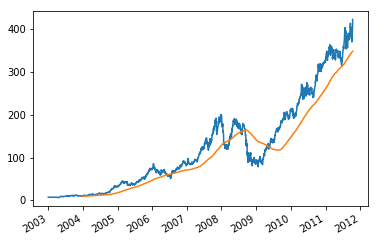

In [61]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [62]:
appl_std250 = close_px.AAPL.rolling(250,min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Name: AAPL, dtype: float64

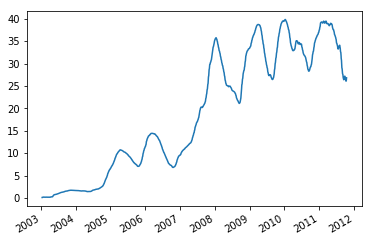

In [63]:
appl_std250.plot()

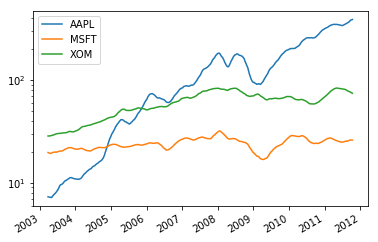

In [64]:
close_px.rolling(60).mean().plot(logy=True)

In [65]:
#指定固定大小的时间，来处理不规律的时间序列
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


<font size=4 face='黑体'>7.1 指数加权函数

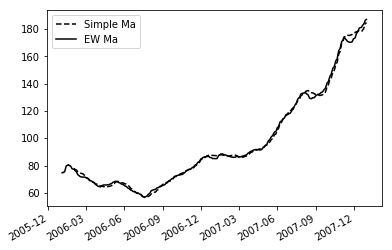

In [67]:
import matplotlib.pyplot as plt
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30,min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--',label='Simple Ma')
ewma60.plot(style='k-',label='EW Ma')
plt.legend()

<font size=4 face='黑体'>7.2 二元移动窗口函数

In [68]:
#计算百分比变化
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

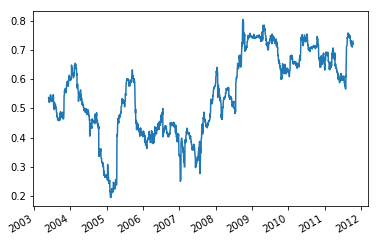

In [69]:
#两只股票的相关系数
corr = returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

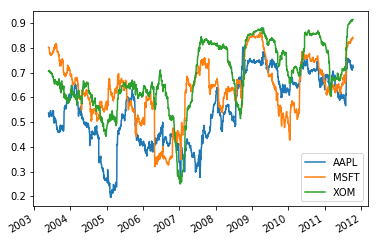

In [70]:
#一次性计算多只股票与标准普尔500指数的相关系数
corr = returns.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

<font size=4 face='黑体'>7.3 用户定义的移动窗口函数

H:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


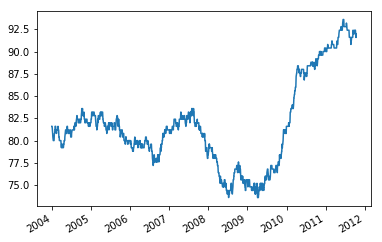

In [71]:
from scipy.stats import percentileofscore

score_at_2percent = lambda x : percentileofscore(x,0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()